### Model 1() 

Dataset: Sunspots
downloading data...
...done. Path = data\forecasting\Sunspots.csv


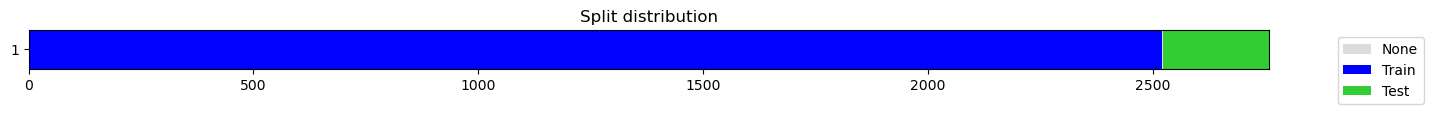

epoch,train_loss,valid_loss,mae,time
0,4100.138672,7901.702148,74.476677,00:09
1,4148.232422,7786.920410,74.179962,00:09


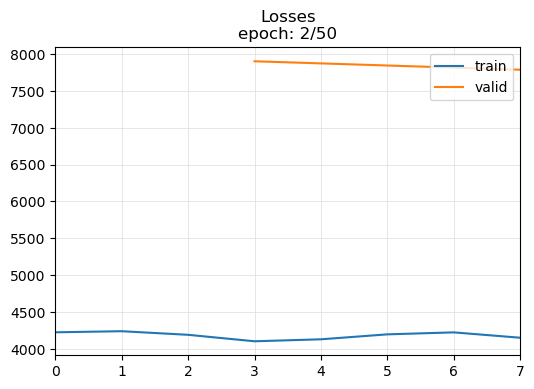

KeyboardInterrupt: 

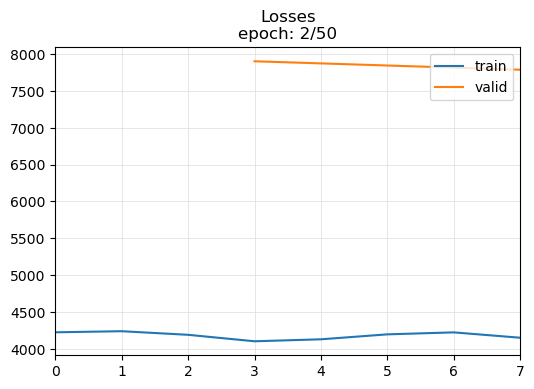

In [37]:
from tsai.basics import *

ts = get_forecasting_time_series("Sunspots").values
X, y = SlidingWindow(60, horizon=3)(ts)
splits = TimeSplitter(235, fcst_horizon=3)(y) 
tfms = [None, TSForecasting()]
batch_tfms = TSStandardize()
fcst = TSForecaster(X, y, splits=splits, path='models', tfms=tfms, batch_tfms=batch_tfms, bs=512, arch="TSTPlus", metrics=mae, cbs=ShowGraph())
fcst.fit_one_cycle(50, 1e-3)
fcst.export("fcst.pkl")

In [27]:
from tsai.inference import load_learner
fcst = load_learner("models/fcst.pkl", cpu=False)
raw_preds, target, preds = fcst.get_X_preds(X[splits[1]], y[splits[1]])

torch.Size([235, 1])

### Model 2()


In [36]:
X

array([[[ 58. ,  62.6,  70. , ...,  25. ,  20. ,   6.7]],

       [[ 62.6,  70. ,  55.7, ...,  20. ,   6.7,   0. ]],

       [[ 70. ,  55.7,  85. , ...,   6.7,   0. ,   3. ]],

       ...,

       [[125.1,  97.9, 122.7, ...,  82.2,  71.8,  50.3]],

       [[ 97.9, 122.7, 166.6, ...,  71.8,  50.3,  55.8]],

       [[122.7, 166.6, 137.5, ...,  50.3,  55.8,  33.3]]])

In [34]:
y

array([ 0. ,  3. ,  1.7, ..., 55.8, 33.3, 33.4])

In [44]:
tfms =  TSSequencerPlus()
batch_tfms = TSStandardize()
fcst = TSSequencerPlus(X, y, splits=splits, path='models', tfms=tfms, batch_tfms=batch_tfms, bs=512, arch="TSTPlus", metrics=mae, cbs=ShowGraph())
fcst.fit_one_cycle(50, 1e-3)
fcst.export("fcst.pkl")

TypeError: TSSequencerPlus.__init__() missing 3 required positional arguments: 'c_in', 'c_out', and 'seq_len'

In [42]:
from tsai.all import TSSequencerPlus
